    # Automatic Jupyter Notebook for OpenML dataset 6: letter

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 6
data = oml.datasets.get_dataset(did)
X, y, features = getData(data)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

,flow,score
0,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999796
1,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999790
2,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999789
3,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999785
4,sklearn.model_selection._search.RandomizedSear...,0.999785
5,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999784
6,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999778
7,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999777
8,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999777
9,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999774


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


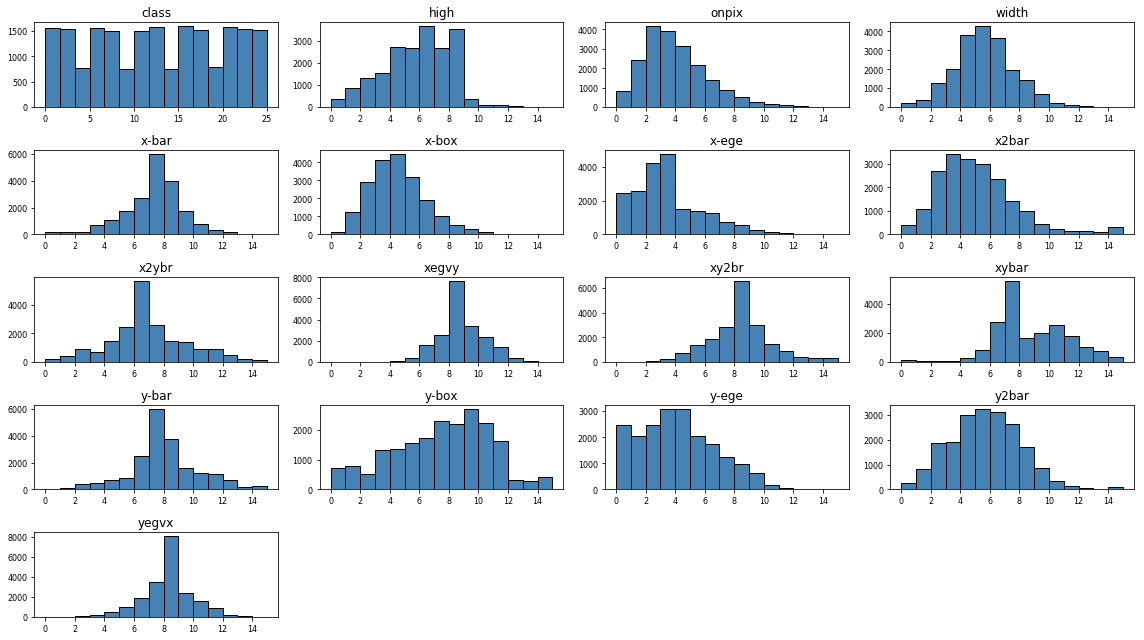

In [3]:
from scripts.dataVisualization import *
show1DHist(data) 

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,outlier
7933,7,8,9,12,13,8,10,5,1,5,7,10,7,14,8,13,-0.0867979
10241,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8,-0.0865663
11407,15,15,15,8,8,3,9,6,6,3,2,13,10,12,2,8,-0.0830005
16378,6,8,9,12,14,8,5,6,1,6,6,9,10,10,8,14,-0.0822307
12992,9,10,13,8,10,3,8,4,5,10,11,11,12,8,6,6,-0.0795196
1423,10,14,11,8,5,13,1,5,3,13,1,9,6,3,1,9,-0.0792782
2682,14,15,14,8,7,10,11,7,4,4,6,10,10,13,3,6,-0.0760042
351,13,15,13,8,7,3,8,6,6,4,2,13,9,11,2,8,-0.0726845
3073,7,11,11,8,15,9,7,3,3,8,5,7,12,4,5,5,-0.071578
5228,15,15,15,8,7,9,11,6,4,4,6,10,11,13,2,6,-0.0704488


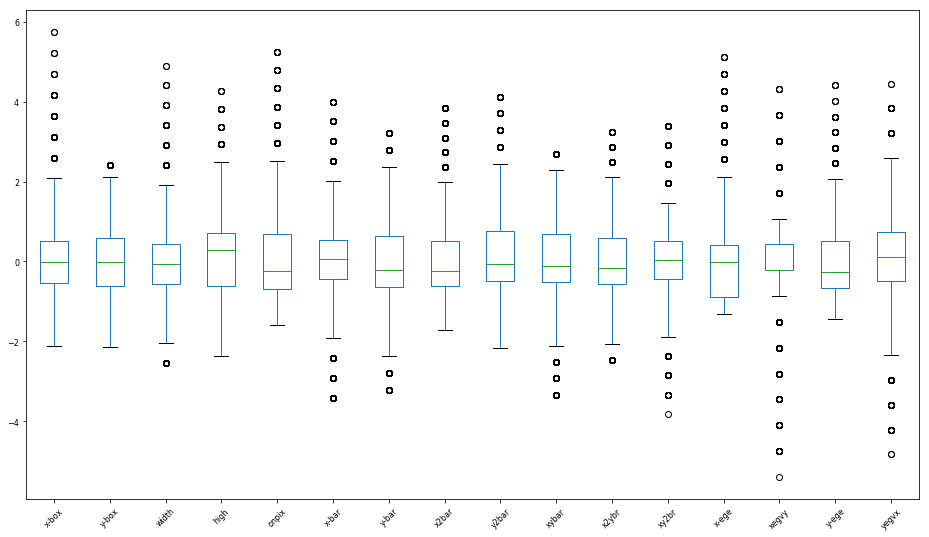

In [4]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [5]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

     did                                              name  similarity  \
0    531                                            boston       0.649   
1  40984                                           segment       0.613   
2  41169                                            helena       0.598   
3   4153  Smartphone-Based_Recognition_of_Human_Activities       0.596   
4   1549                                  autoUniv-au6-750       0.594   
5   1491                         one-hundred-plants-margin       0.589   
6   1492                          one-hundred-plants-shape       0.589   
7   1493                        one-hundred-plants-texture       0.587   
8   1478                                               har       0.583   
9  41163                                           dilbert       0.581   

                              url  
0    https://www.openml.org/d/531  
1  https://www.openml.org/d/40984  
2  https://www.openml.org/d/41169  
3   https://www.openml.org/d/4153  
4   h

Complexity threshold to determine if an algorithm will be run.


In [6]:
comp = 50000000000000

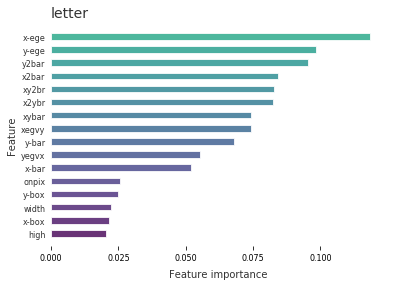

In [7]:
from scripts.featureImportance import *
featureImportance(data) 

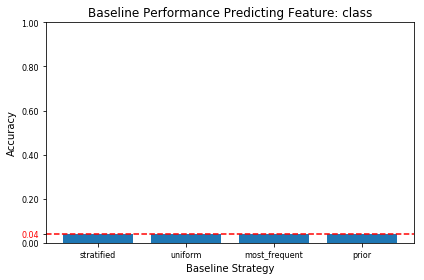

In [8]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [9]:
removeOutliers = False 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Run already exists in OpenML, WIP
Run already exists in OpenML, WIP


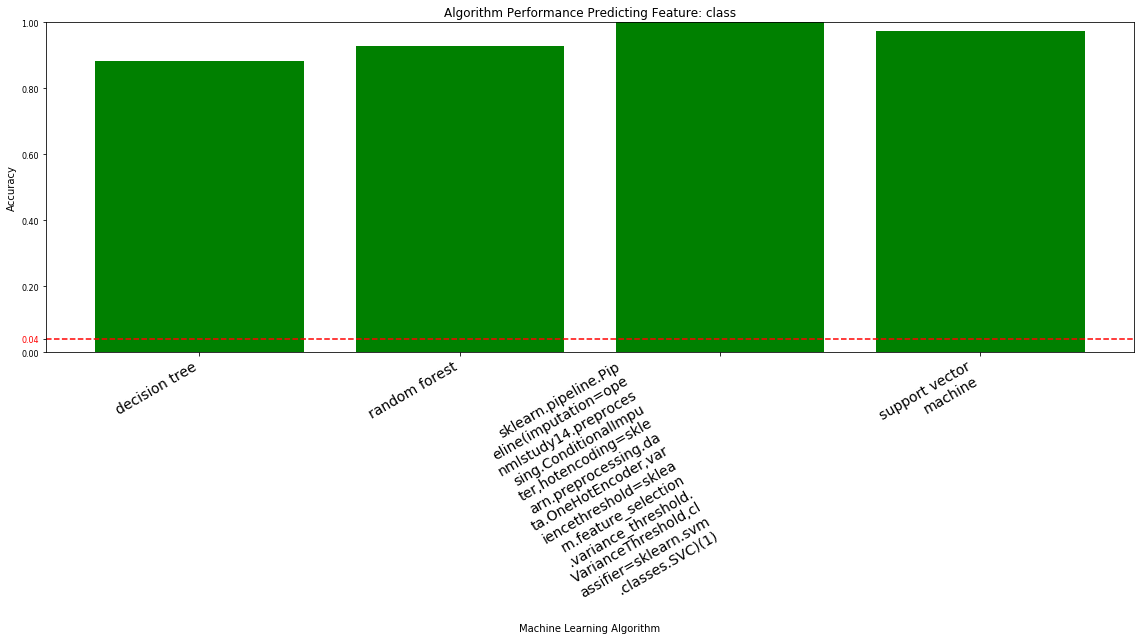

In [10]:
from scripts.machineLearningAlgorithms import *
settings = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, settings.strats, maxBaseline, problemType) 

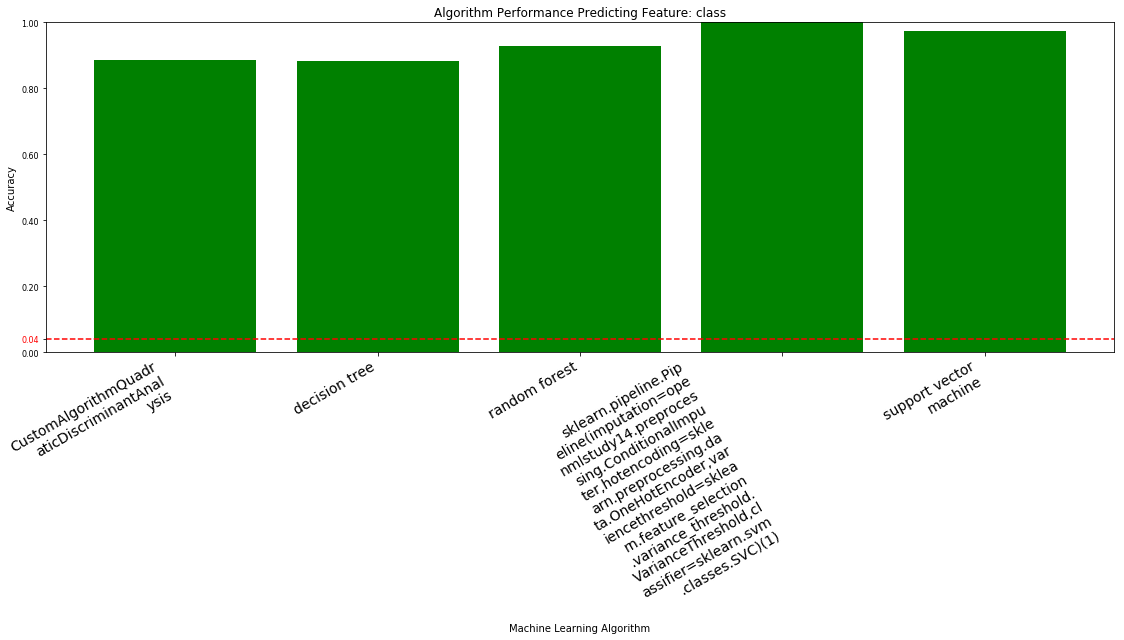

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Create a custom algorithm by setting classifier and name
#---------------------------------------------------
clf =  QuadraticDiscriminantAnalysis()
name = "CustomAlgorithmQuadraticDiscriminantAnalysis"
#---------------------------------------------------
runMLAlgorithm(estimator=clf, name=name, settings=settings)
plot_alg(data, settings.strats, maxBaseline, problemType) 

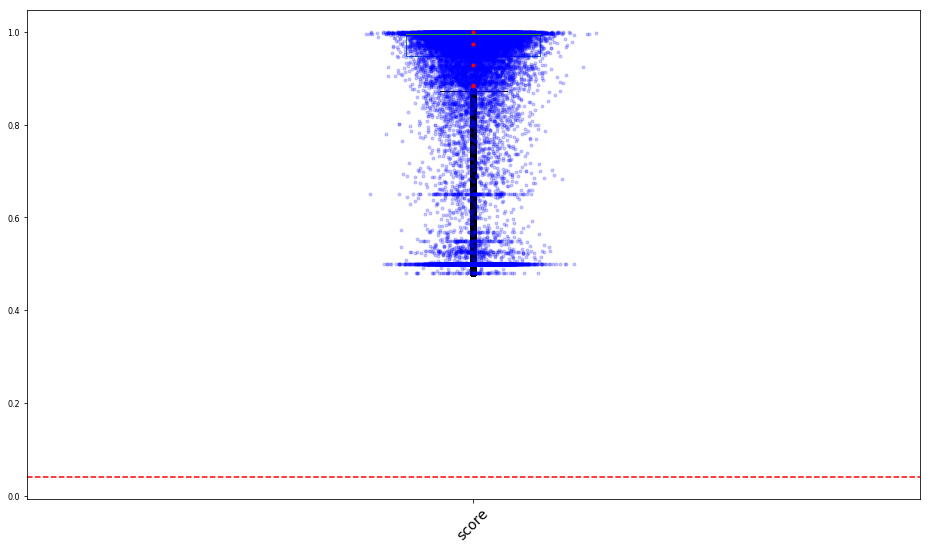

In [12]:
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, settings.strats, maxBaseline) 